### Задача 1

Импорт необходимых библиотек

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

Определение системы

In [2]:
def odes(t,y,f_a):
    I, N = y
    dydt = [(N-1)*I,
            eta_g*(J+delta_a*np.sin(2*np.pi*f_a*t)-N*(1+I))        
    ]
    return dydt

Параметры

In [3]:
tau_p=20*10**(-12)
tau_c=1*10**(-9)
eta_g=tau_p/tau_c
J=4
J2=0.75*J
delta_a=0.1*J

В первой лабораторной работе значение частоты определено как $f_{ro}=1.923\text{ ГГц}$. Для перехода к нормированным единицам домножим на время жизни фотона в резонаторе:

In [4]:
f=1.923*10**9*tau_p
f_array=np.arange(0.05*f,1.25*f, (1.25*f-0.05*f)/20)

Получен массив из 20 значений для дальнейшего расчета. Для определения временного промежутка найдем величину $\frac{20}{f_A}$ (подобрана, так как $\frac{10}{f_A}$ демонстрирует некорректную зависимость):

In [5]:
t_range=20/f

В соответствии с первой лабораторной и рассчитанной величиной вводим начальные значения для двух параметров накачки и вектор времени:

In [6]:
y01=(J-1,1)
y02=(J2-1,1)
t=np.linspace(0,int(t_range),int(t_range)*10)

Интегрирование системы с определением минимальных и максимальных значений интенсивности

In [7]:
I_min1, I_max1=np.empty(20), np.empty(20)
I_min2, I_max2=np.empty(20), np.empty(20)
for i in range(len(f_array)):
    solution_ivp1=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y01, args=(f_array[i],), rtol=1e-8)
    solution_ivp2=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y02, args=(f_array[i],), rtol=1e-8)
    I_min1[i], I_max1[i]=min(solution_ivp1.y[0]), max(solution_ivp1.y[0])
    I_min2[i], I_max2[i]=min(solution_ivp2.y[0]), max(solution_ivp2.y[0])

Переход к частотам в ГГц

In [8]:
f_axis=f_array/(tau_p*10**9)

График

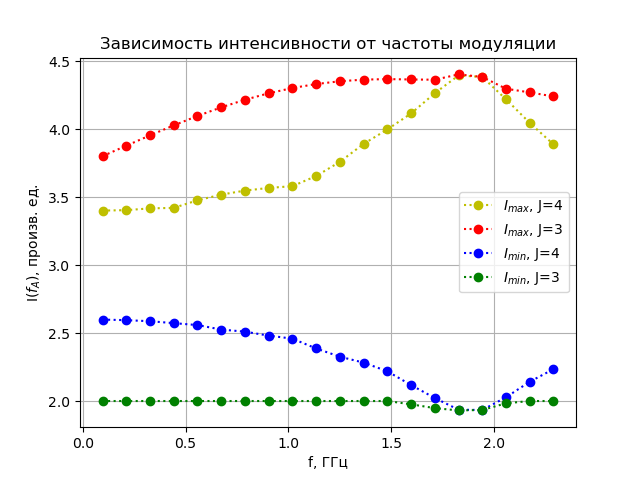

In [9]:
%matplotlib widget
plt.figure(1)
plt.title('Зависимость интенсивности от частоты модуляции')
plt.xlabel('f, ГГц')
plt.ylabel('I($f_A$), произв. ед.')
plt.plot(f_axis, I_max1, 'yo:', label='$I_{max}$, J='+str(J))
plt.plot(f_axis, I_max2, 'ro:', label='$I_{max}$, J='+str(round(J2)))
plt.plot(f_axis, I_min1, 'bo:', label='$I_{min}$, J='+str(J))
plt.plot(f_axis, I_min2, 'go:', label='$I_{min}$, J='+str(round(J2)))
plt.legend(loc='best')
plt.grid()
plt.savefig('graph1.png',dpi=600)
plt.show()